In [63]:
import numpy as np
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.optim as optim
from script.tools import tools
from script.collection import Parameter as pmt
import sys
print(sys.executable)
import net
import os
from script.tools import collection
xlst = []
ylst = []
xylst = []
keys = []
expect = ['Seed','key','default']

x = np.linspace(-1, 1, 100)
y = 2 * x**2 + 3 * x + 1

# 转换为张量
x_tensor = torch.from_numpy(x).unsqueeze(1).float()
y_tensor = torch.from_numpy(y).unsqueeze(1).float()
print(x_tensor.size(),y_tensor.size())
#x_ytensor = torch.tensor(xylst,dtype=torch.float)


# 计算均值和标准差
x_mean = x_tensor.mean(dim=0)
x_std = x_tensor.std(dim=0)
y_mean = y_tensor.mean(dim=0)
y_std = y_tensor.std(dim=0)

# 归一化 x 和 y
normalized_x = (x_tensor - x_mean) / x_std
normalized_y = (y_tensor - y_mean) / y_std
#print("x_mean: ",x_mean)
#print("x_std: ",x_std)
#print("y_mean: ",y_mean)
#print("y_std: ",y_std)
#print(x_tensor[0])
#print(keys)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/opt/homebrew/anaconda3/bin/python
torch.Size([100, 1]) torch.Size([100, 1])


In [68]:
model = net.DeepNet(1,10,1,1)
criterion = nn.MSELoss()

In [69]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# dataset = CustomDataset(x_tensor, y_tensor)
dataset = CustomDataset(normalized_x, normalized_y)



#optimizer = optim.SGD(model.parameters(), lr=0.001)




In [73]:
batch_size = 5
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 25000

loss_history = []
for epoch in range(num_epochs):
    total_loss = 0.0
    i = 0
    for batch_x, batch_y in dataloader:
        #print(batch_x,batch_x)
        #i = i +1
        #print(batch_x,"\n",batch_y)
        #print("zzzzzzz")
        # 前向传播
        outputs = model(batch_x)
        #print("batch_x",batch_x[0],"\n outputs: ",outputs[0])
        loss = criterion(outputs, batch_y)
        i = i +1
        if i == -1:
            print("i=------"+str(i),"\n outputs: ",outputs,"\n y:",batch_y)
        total_loss += loss.item()

        #print("loss:",loss.item(),"batch_x: ",batch_x," outputs ",outputs," batch_y: ",batch_y)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #loss_history.append(total_loss)
    # 打印训练信息
    if (epoch+1) % 10 == 0:
        average_loss = total_loss / len(dataloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.10f}')



Epoch [10/25000], Loss: 0.0008313707
Epoch [20/25000], Loss: 0.0008316518
Epoch [30/25000], Loss: 0.0008307080
Epoch [40/25000], Loss: 0.0008265603
Epoch [50/25000], Loss: 0.0008298850
Epoch [60/25000], Loss: 0.0008269711
Epoch [70/25000], Loss: 0.0008269826
Epoch [80/25000], Loss: 0.0008248526
Epoch [90/25000], Loss: 0.0008226100
Epoch [100/25000], Loss: 0.0008254997
Epoch [110/25000], Loss: 0.0008281033
Epoch [120/25000], Loss: 0.0008206762
Epoch [130/25000], Loss: 0.0008206390
Epoch [140/25000], Loss: 0.0008220540
Epoch [150/25000], Loss: 0.0008178450
Epoch [160/25000], Loss: 0.0008158001
Epoch [170/25000], Loss: 0.0008170111
Epoch [180/25000], Loss: 0.0008165058
Epoch [190/25000], Loss: 0.0008212091
Epoch [200/25000], Loss: 0.0008145857
Epoch [210/25000], Loss: 0.0008216126
Epoch [220/25000], Loss: 0.0008135606
Epoch [230/25000], Loss: 0.0008106393
Epoch [240/25000], Loss: 0.0008130531
Epoch [250/25000], Loss: 0.0008119296
Epoch [260/25000], Loss: 0.0008111611
Epoch [270/25000], Lo

mean : tensor([1.6801])  std tensor([1.8615])
 out without normalization tensor([-0.2525], grad_fn=<AddBackward0>)
x= tensor([0.1111]) y = tensor([1.3580])  out= tensor([1.2101], grad_fn=<AddBackward0>)
2x**2 +3*x +1 : tensor([0.3580])
rate  tensor([0.1089], grad_fn=<DivBackward0>)


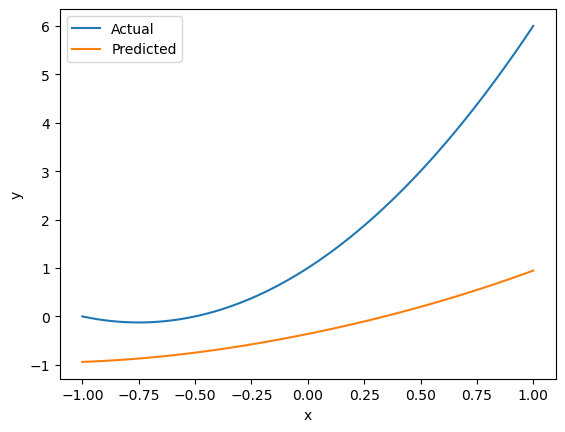

In [74]:
from matplotlib import pyplot as plt


def test(m,x,y,mean,std):
    print("mean :",mean," std",std)
    out = m(x)
    print(" out without normalization",out)
    out = out * std + mean
    print("x=",x ,"y =", y," out=",out)
    print("2x**2 +3*x +1 :",2*(x**2) + 3*x)
    print("rate ",(y-out)/y)
test(model,x_tensor[55],y_tensor[55],y_mean,y_std)
predicted = model(x_tensor).detach().numpy()
plt.plot(x, y, label='Actual')
plt.plot(x, predicted, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
result1 = []
result1 = collection.collection("collection/workspace",result1)

collection:  1070


In [48]:
#print(xlst[0])
print(len(xlst[0]))
tx = []
tx.append(keys)
i = 0
for y_ in ylst:
    x_ = xlst[i].copy()
    x_.append(y_[0])
    tx.append(x_)
    i = i + 1
print(tx[0])
tools.lst2excel(tx,"test.xlsx")

48
['PCIe_Lane_Bandwidth', 'PCIe_Lane_Count', 'SATA_Processing_Delay', 'Queue_Fetch_Size', 'Data_Cache_DRAM_Row_Size', 'Data_Cache_DRAM_Data_Rate', 'Data_Cache_DRAM_Data_Busrt_Size', 'Data_Cache_DRAM_tRCD', 'Data_Cache_DRAM_tCL', 'Data_Cache_DRAM_tRP', 'Overprovisioning_Ratio', 'GC_Exec_Threshold', 'Preferred_suspend_erase_time_for_read', 'Preferred_suspend_erase_time_for_write', 'Preferred_suspend_write_time_for_read', 'Flash_Channel_Count', 'Flash_Channel_Width', 'Channel_Transfer_Rate', 'Chip_No_Per_Channel', 'Page_Read_Latency_LSB', 'Page_Read_Latency_CSB', 'Page_Read_Latency_MSB', 'Page_Program_Latency_LSB', 'Page_Program_Latency_CSB', 'Page_Program_Latency_MSB', 'Block_Erase_Latency', 'Block_PE_Cycles_Limit', 'Suspend_Erase_Time', 'Suspend_Program_Time', 'Die_No_Per_Chip', 'Plane_No_Per_Die', 'Block_No_Per_Plane', 'Page_No_Per_Block', 'Page_Capacity', 'Page_Metadat_Capacity', 'Channel_IDs', 'Chip_IDs', 'Die_IDs', 'Plane_IDs', 'Initial_Occupancy_Percentage', 'Working_Set_Percentag

In [35]:
print(len(keys))

48


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 生成抛物线样本
def generate_samples(n):
    x = np.linspace(-1, 1, n)
    y = 2 * x**2 + 0.5 * np.random.randn(n)
    return x, y

# 定义生成器网络
generator = Sequential()
generator.add(Dense(10, input_dim=1, activation='relu'))
generator.add(Dense(10, activation='relu'))
generator.add(Dense(1))

# 定义判别器网络
discriminator = Sequential()
discriminator.add(Dense(10, input_dim=1, activation='relu'))
discriminator.add(Dense(10, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# 编译判别器网络
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.001))

# 设置生成器和判别器的训练参数
epochs = 2000
batch_size = 32

# 训练GAN模型
for epoch in range(epochs):
    # 生成样本
    x_real, y_real = generate_samples(batch_size)
    x_fake = np.random.uniform(-1, 1, size=(batch_size, 1))
    y_fake = generator.predict(x_fake)

    # 训练判别器
    x = np.concatenate([x_real, x_fake])
    y = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    discriminator_loss = discriminator.train_on_batch(x, y)

    # 训练生成器
    x_fake = np.random.uniform(-1, 1, size=(batch_size, 1))
    y_real = np.ones((batch_size, 1))
    generator_loss = discriminator.train_on_batch(x_fake, y_real)

    # 打印损失
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# 生成拟合抛物线的样本
x_generated = np.linspace(-1, 1, 100)
y_generated = generator.predict(x_generated)

# 绘制结果
plt.scatter(x_real, y_real, c='b', label='Real')
plt.scatter(x_fake, y_fake, c='r', label='Generated')
plt.plot(x_generated, y_generated, c='g', label='Fitted Parabola')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

Epoch 0/2000, Discriminator Loss: 1.3772509098052979, Generator Loss: 0.7231162786483765
Epoch 100/2000, Discriminator Loss: 1.3935115337371826, Generator Loss: 0.6746005415916443
Epoch 200/2000, Discriminator Loss: 1.355374813079834, Generator Loss: 0.7160216569900513
Epoch 300/2000, Discriminator Loss: 1.2885584831237793, Generator Loss: 0.7593908309936523
Epoch 400/2000, Discriminator Loss: 1.5297893285751343, Generator Loss: 0.6482973098754883
Epoch 500/2000, Discriminator Loss: 1.2229822874069214, Generator Loss: 0.969281792640686
Epoch 600/2000, Discriminator Loss: 1.4033172130584717, Generator Loss: 0.6898471117019653
Epoch 700/2000, Discriminator Loss: 1.4166321754455566, Generator Loss: 0.6742292046546936
Epoch 800/2000, Discriminator Loss: 1.286409616470337, Generator Loss: 0.7854747772216797
Epoch 900/2000, Discriminator Loss: 1.407820701599121, Generator Loss: 0.6678938865661621
Epoch 1000/2000, Discriminator Loss: 1.372031569480896, Generator Loss: 0.7228574752807617
Epoch

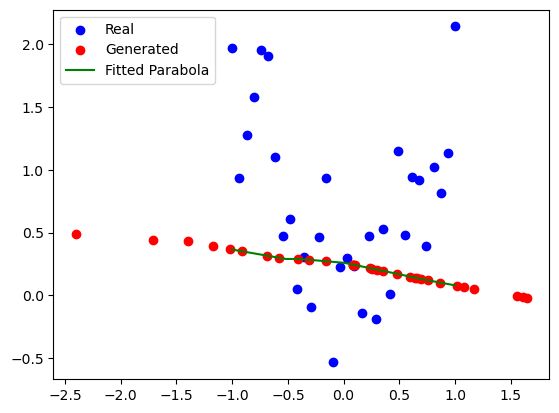

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 生成抛物线样本
def generate_samples(n):
    x = np.linspace(-1, 1, n)
    y = 2 * x**2 + 0.5 * np.random.randn(n)
    return x, y

# 定义生成器网络
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.model(x)

# 定义判别器网络
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# 初始化生成器和判别器
generator = Generator()
discriminator = Discriminator()

# 定义损失函数和优化器
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

# 设置训练参数
epochs = 2000
batch_size = 32

# 训练GAN模型
for epoch in range(epochs):
    # 生成样本
    x_real, y_real = generate_samples(batch_size)
    x_real = torch.from_numpy(x_real).float().view(-1, 1)
    y_real = torch.from_numpy(y_real).float().view(-1, 1)
    x_fake = torch.randn(batch_size, 1)

    # 训练判别器
    discriminator_optimizer.zero_grad()

    # 判别器对真实样本的判断
    real_predictions = discriminator(x_real)
    real_loss = criterion(real_predictions, torch.ones_like(real_predictions))

    # 判别器对生成样本的判断
    fake_predictions = discriminator(generator(x_fake))
    fake_loss = criterion(fake_predictions, torch.zeros_like(fake_predictions))

    # 判别器总损失
    discriminator_loss = real_loss + fake_loss
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # 训练生成器
    generator_optimizer.zero_grad()

    # 生成器对生成样本的判断
    fake_predictions = discriminator(generator(x_fake))
    generator_loss = criterion(fake_predictions, torch.ones_like(fake_predictions))

    # 生成器损失
    generator_loss.backward()
    generator_optimizer.step()

    # 打印损失
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Discriminator Loss: {discriminator_loss.item()}, Generator Loss: {generator_loss.item()}")

# 生成拟合抛物线的样本
x_generated = np.linspace(-1, 1, 100)
x_generated_tensor = torch.from_numpy(x_generated).float().view(-1, 1)
y_generated = generator(x_generated_tensor).detach().numpy()

# 绘制结果
plt.scatter(x_real.numpy(), y_real.numpy(), c='b', label='Real')
plt.scatter(x_fake.numpy(), generator(x_fake).detach().numpy(), c='r', label='Generated')
plt.plot(x_generated, y_generated, c='g', label='Fitted Parabola')
plt.legend()
plt.show()

Epoch 0/2000, Generator Loss: 1.298168420791626
Epoch 100/2000, Generator Loss: 0.7875001430511475
Epoch 200/2000, Generator Loss: 0.4995307922363281
Epoch 300/2000, Generator Loss: 0.40308457612991333
Epoch 400/2000, Generator Loss: 0.37523311376571655
Epoch 500/2000, Generator Loss: 0.4149935245513916
Epoch 600/2000, Generator Loss: 0.40039753913879395
Epoch 700/2000, Generator Loss: 0.40359628200531006
Epoch 800/2000, Generator Loss: 0.39975041151046753
Epoch 900/2000, Generator Loss: 0.40153974294662476
Epoch 1000/2000, Generator Loss: 0.40438205003738403
Epoch 1100/2000, Generator Loss: 0.39678817987442017
Epoch 1200/2000, Generator Loss: 0.4024975299835205
Epoch 1300/2000, Generator Loss: 0.4038424491882324
Epoch 1400/2000, Generator Loss: 0.40452998876571655
Epoch 1500/2000, Generator Loss: 0.4040665030479431
Epoch 1600/2000, Generator Loss: 0.4111212193965912
Epoch 1700/2000, Generator Loss: 0.40623003244400024
Epoch 1800/2000, Generator Loss: 0.40201207995414734
Epoch 1900/200

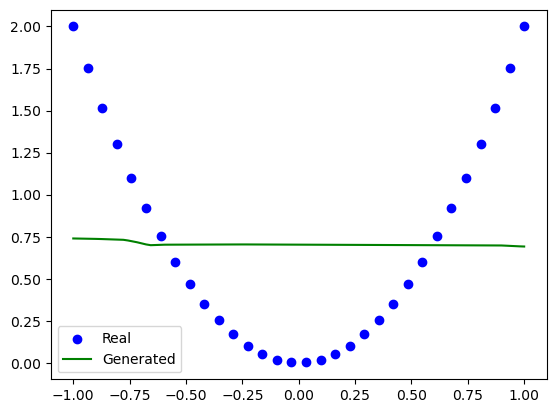

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 生成抛物线样本
def generate_samples(n):
    x = np.linspace(-1, 1, n)
    y = 2 * x**2
    return x, y

# 定义生成器网络
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.model(x)

# 初始化生成器
generator = Generator()

# 定义损失函数和优化器
criterion = nn.MSELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.001)

# 设置训练参数
epochs = 2000
batch_size = 32

# 训练生成器模型
for epoch in range(epochs):
    # 生成样本
    x_real, y_real = generate_samples(batch_size)
    x_real = torch.from_numpy(x_real).float().view(-1, 1)
    y_real = torch.from_numpy(y_real).float().view(-1, 1)

    # 训练生成器
    generator_optimizer.zero_grad()

    # 生成器生成样本
    x_fake = torch.randn(batch_size, 1)
    y_fake = generator(x_fake)

    # 计算生成器损失
    generator_loss = criterion(y_fake, y_real)

    # 反向传播和优化
    generator_loss.backward()
    generator_optimizer.step()

    # 打印损失
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Generator Loss: {generator_loss.item()}")

# 生成拟合抛物线的样本
x_generated = np.linspace(-1, 1, 100)
x_generated_tensor = torch.from_numpy(x_generated).float().view(-1, 1)
y_generated = generator(x_generated_tensor).detach().numpy()

# 绘制结果
plt.scatter(x_real.numpy(), y_real.numpy(), c='b', label='Real')
plt.plot(x_generated, y_generated, c='g', label='Generated')
plt.legend()
plt.show()

x + x^(3)/3! 


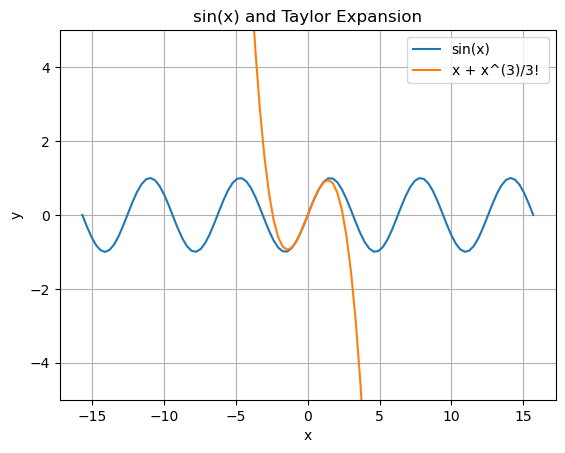

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def taylor_sin(x, n):
    s = ""
    result = 0
    for i in range(n):
        if i%2 == 1:
            s = s +" -"
        else:
            s = s + " +"
        if i == 1:
            s ="x + "
        s = s + "x^({})".format(str(2*i+1))+"/"+ str(2*i+1)+"! "
        term = ((-1) ** i) * (x ** (2 * i + 1)) / np.math.factorial(2 * i + 1)
        result += term
    print(s)
    return result,s
x = np.linspace(-5*np.pi, 5*np.pi, 100)  # x 范围：-2π 到 2π
n = 2  # 使用前 10 项展开

sin_taylor,s = taylor_sin(x, n)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, sin_taylor, label=s)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-5, 5)
plt.title('sin(x) and Taylor Expansion')
plt.grid(True)
plt.show()

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

from PIL import Image

Image_Path = 'taylor'
def taylor_sin(x, n):
    result = 0
    for i in range(n):
        term = ((-1) ** i) * (x ** (2 * i + 1)) / factorial(2 * i + 1)
        result += term
    return result
def saveImg(n,image_path):
    x = np.linspace(-5 * np.pi, 5 * np.pi, 100,dtype=np.float64)

    sin_taylor = taylor_sin(x, n)

    # 生成 LaTeX 公式字符串
    equation = r'$taylor\_sin(x) = x '
    for i in range(3,  2*(n-1) + 2, 2):
        if (i-1)%4 ==0:
            equation +=' + '
        else:
            equation += ' - '
        equation += '  \\frac{{x^{}}}{{{}}}'.format("{" + str(i) + "}", str(i)+"!")
    equation += ' $'
    fig = plt.figure(figsize=(20, 4))
    plt.plot(x, np.sin(x), label='sin(x)',linewidth=4)
    plt.plot(x, sin_taylor, label='taylor_sin(x)',linewidth=1,color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-3, 3)
    plt.legend(loc='upper left')
    plt.plot(0, 0, marker='o', markersize=5, color='red')
    # 在图中添加 LaTeX 公式文本
    plt.text(-17, 1.5, equation, fontsize=12)

    plt.title('sin(x) and Taylor Expansion')
    plt.grid(True)
    #plt.show()
    plt.savefig(image_path)





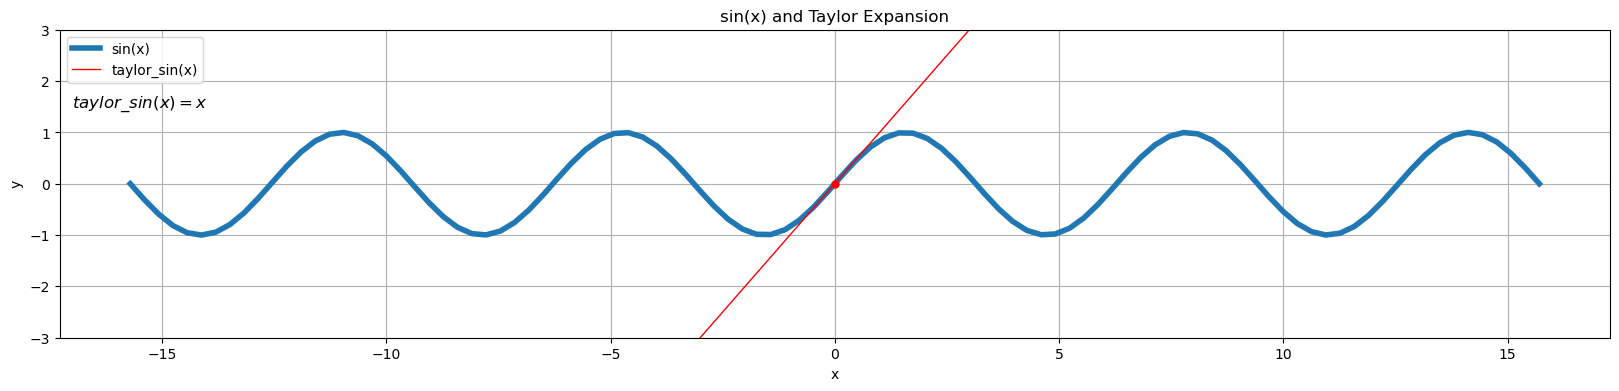

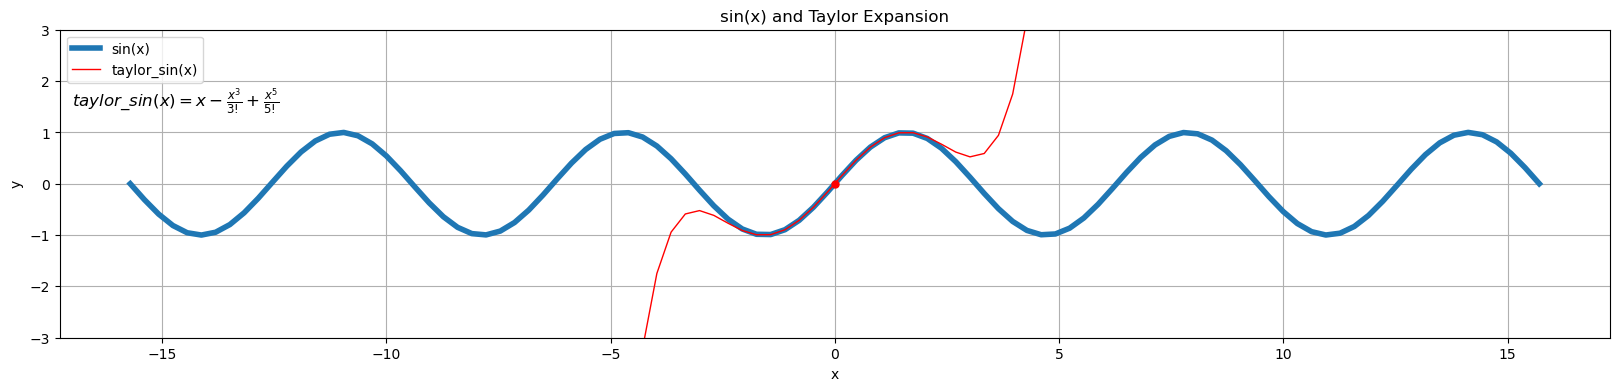

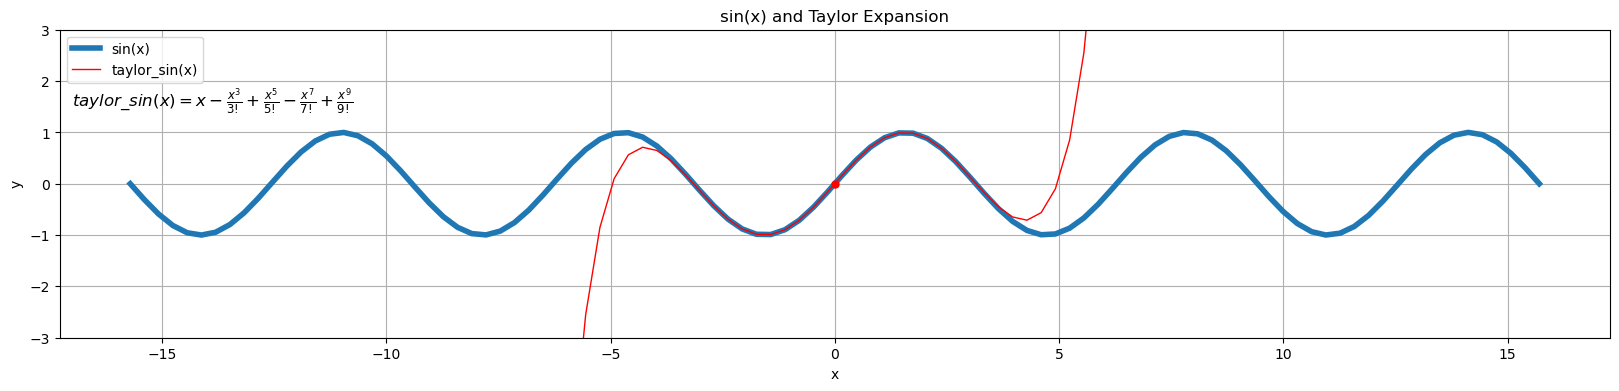

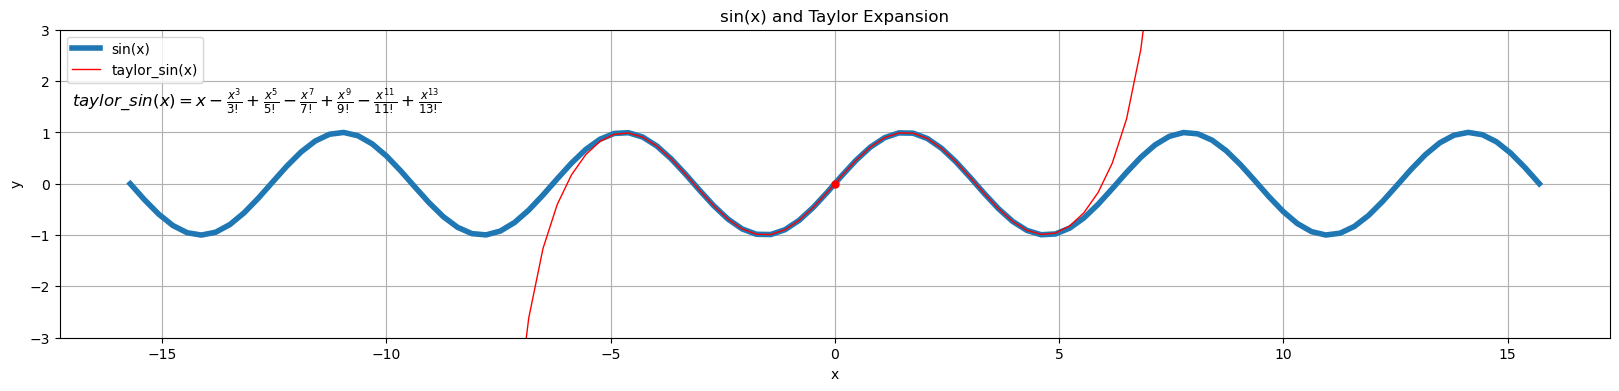

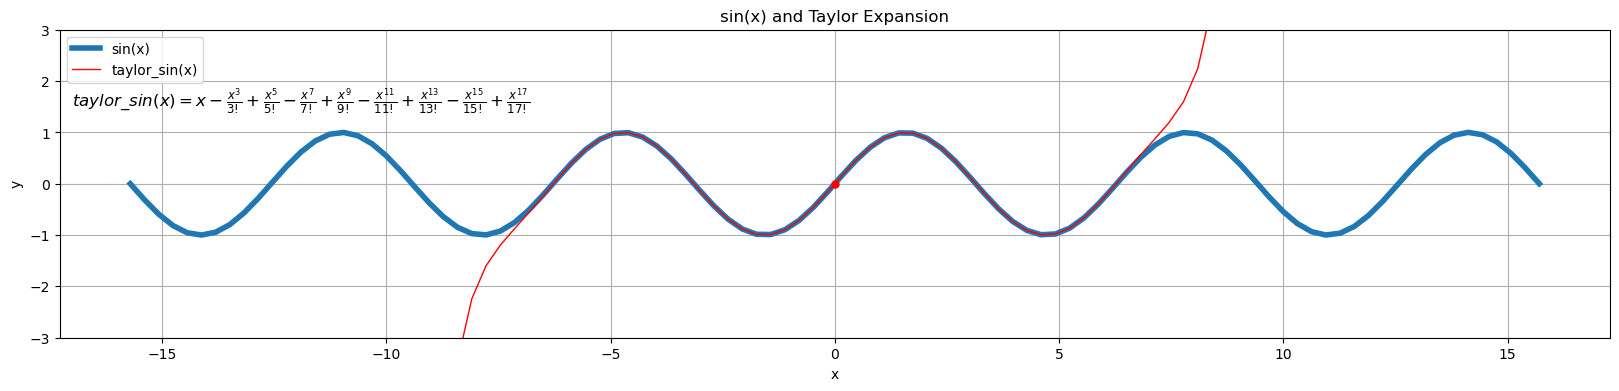

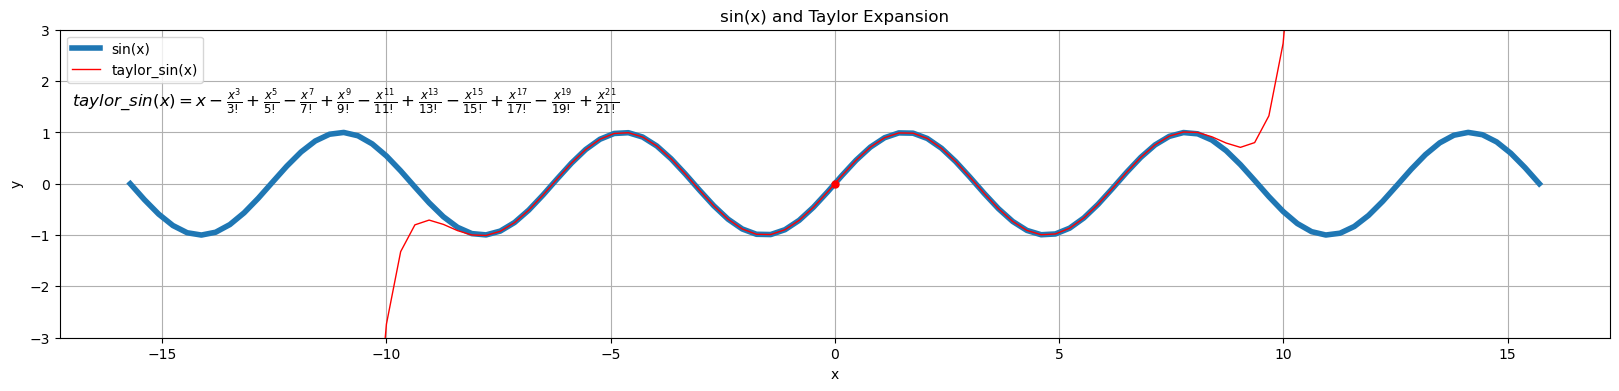

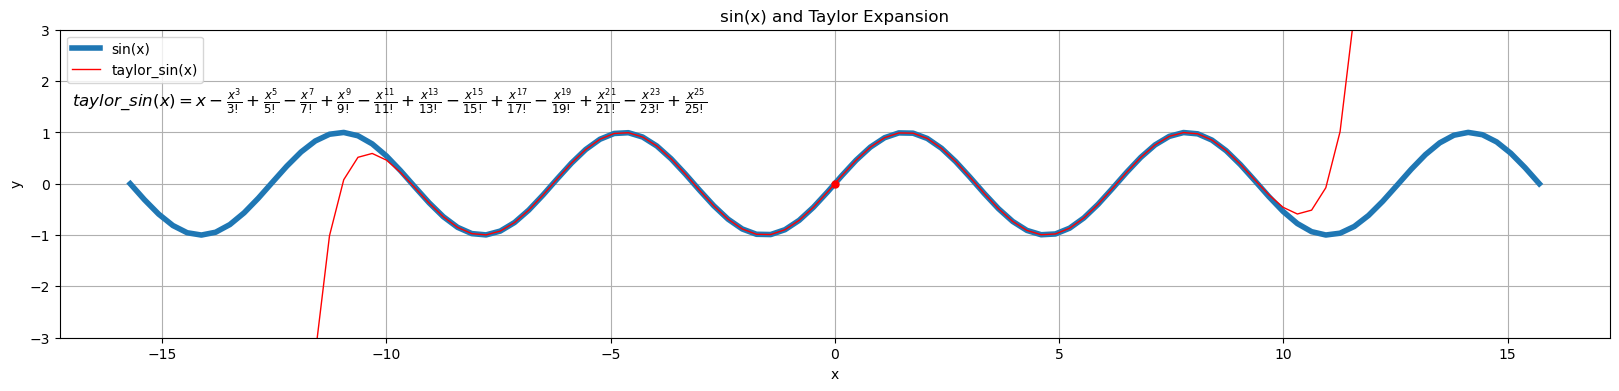

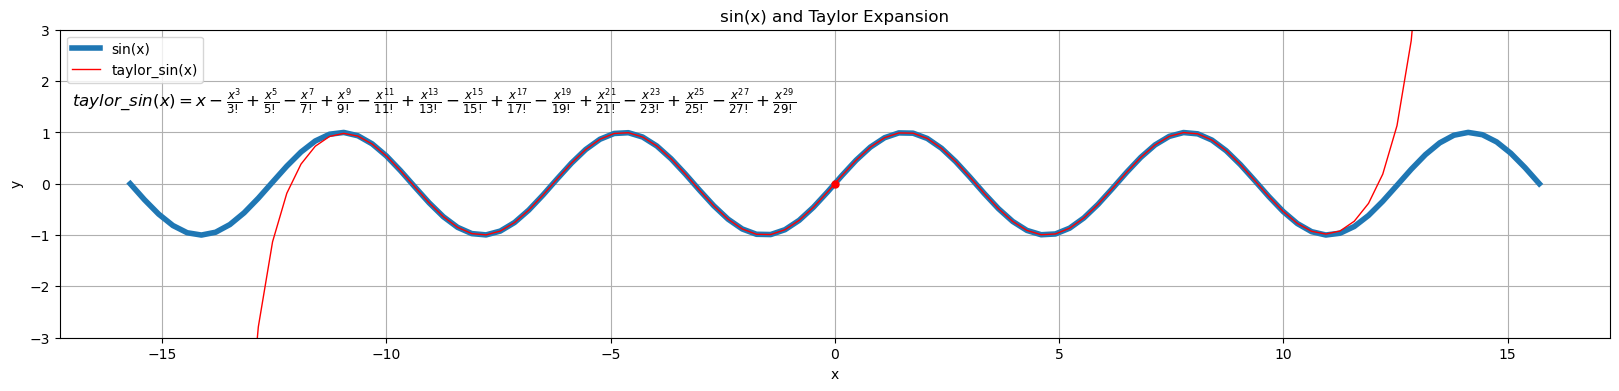

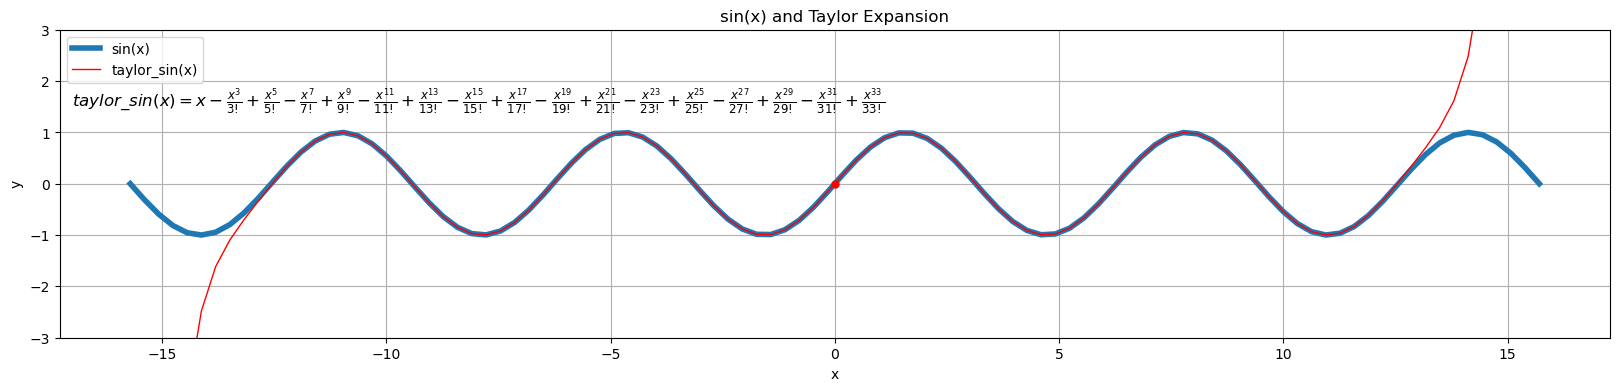

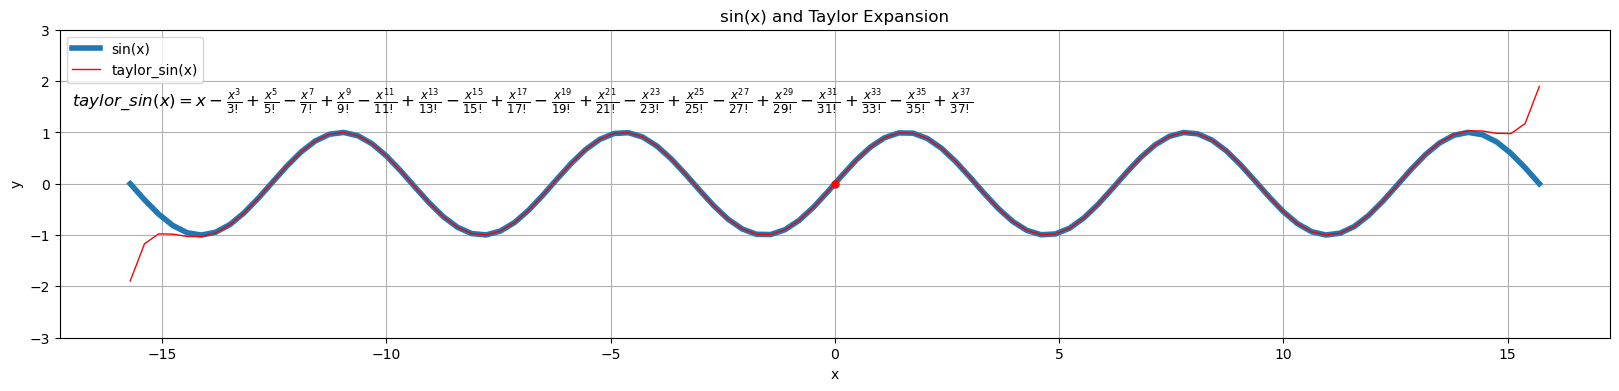

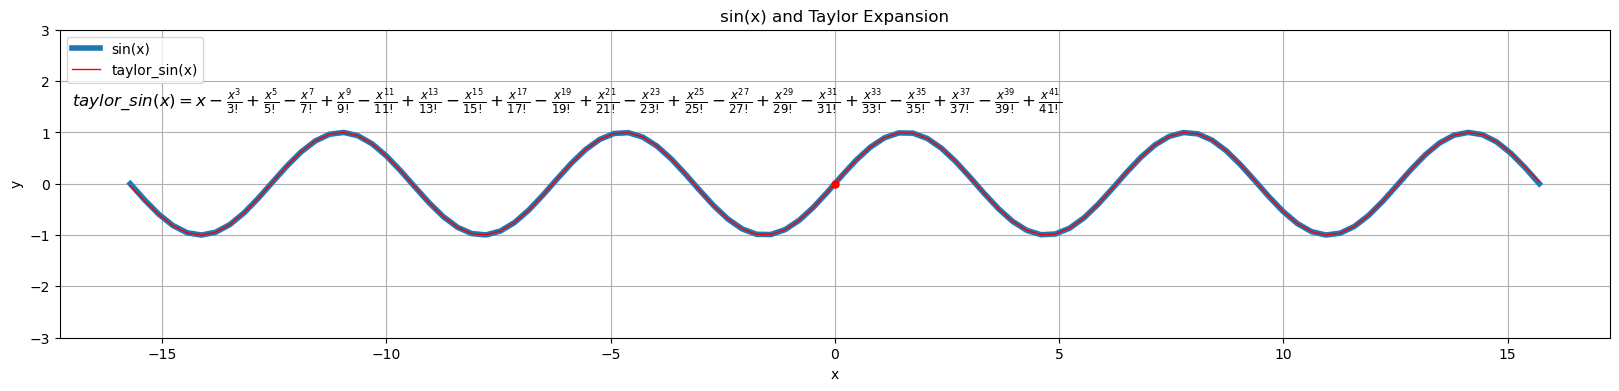

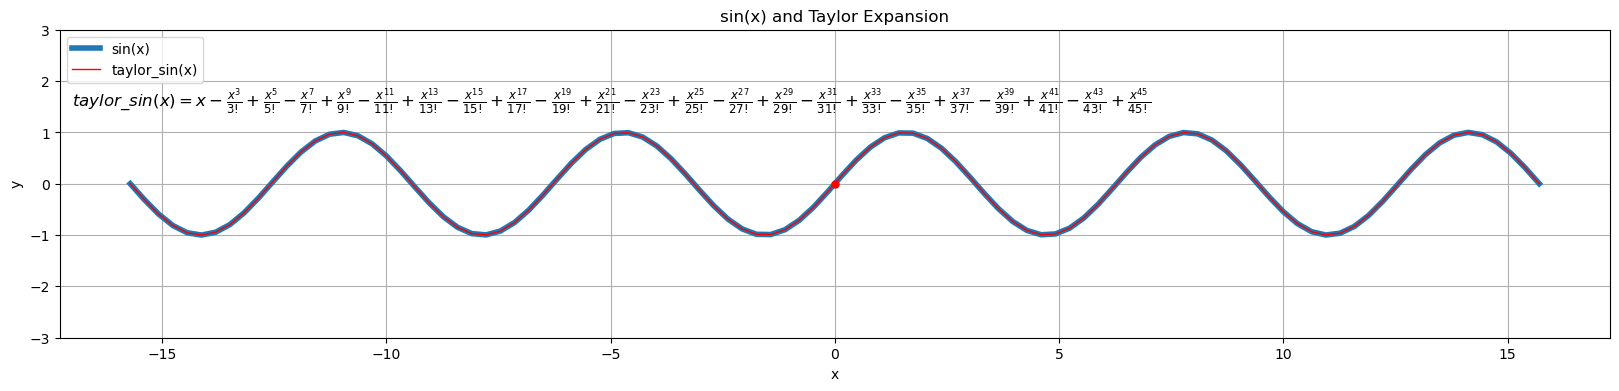

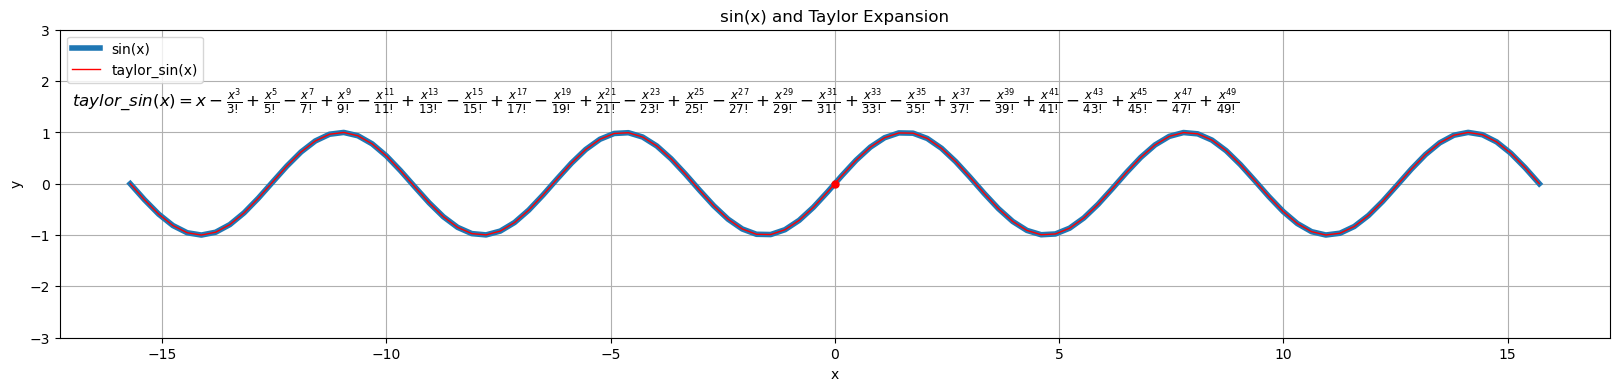

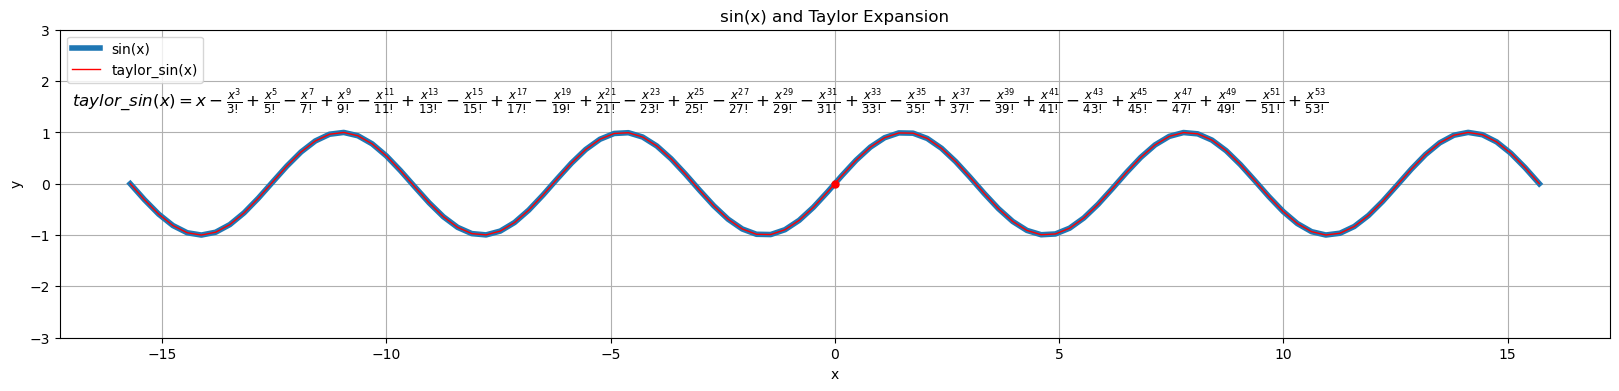

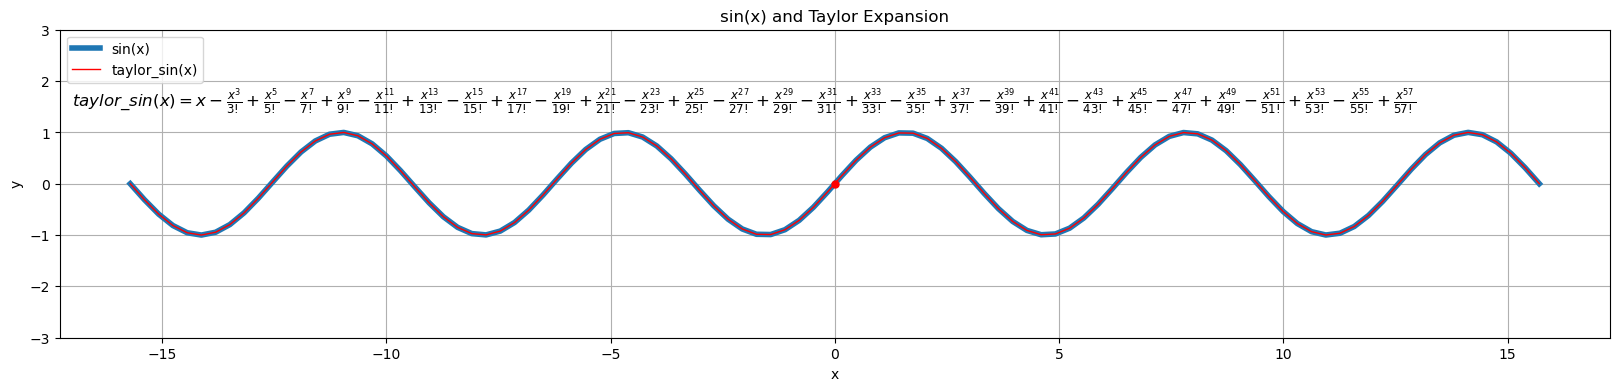

In [211]:
def concatenate_images(image_paths, output_path, axis='horizontal'):
    # 读取图像并存储到列表中
    images = [Image.open(path) for path in image_paths]

    # 确定拼接方向
    if axis == 'horizontal':
        concat_axis = 0
    elif axis == 'vertical':
        concat_axis = 1
    else:
        raise ValueError("Invalid axis value. Must be 'horizontal' or 'vertical'.")

    # 确定拼接后的画布大小
    sizes = [image.size for image in images]
    if axis == 'horizontal':
        total_width = sum([w for w, _ in sizes])
        max_height = max([h for _, h in sizes])
        concat_size = (total_width, max_height)
    else:
        max_width = max([w for w, _ in sizes])
        total_height = sum([h for _, h in sizes])
        concat_size = (max_width, total_height)

    # 创建一张空白画布
    result_image = Image.new('RGB', concat_size)

    # 将图像逐个拼接到画布上
    offset = 0
    for image in images:
        if axis == 'horizontal':
            result_image.paste(image, (offset, 0))
            offset += image.size[0]
        else:
            result_image.paste(image, (0, offset))
            offset += image.size[1]

    # 保存拼接后的图像
    result_image.save(output_path)
images = []
for i in range(0,15):
    path = Image_Path + str(i+1) +".png"
    saveImg(i*2+1,path)
    images.append(path)
concatenate_images(images,"all.png",axis='vertical')

In [ ]:
A = [] # 15 15 10 10 9 9
B = [] # 16 16 10 10 9 8 8
n = []
for i in range(1,20):
    A.append(0)
    B.append(0)
A[15] = 2
A[10] = 2
A[9] = 2
B[16] = 2
B[10] = 2
B[9] = 1
B[8] = 2

class node:
    ca = []
    cb = []
    asturn = True
    current = (0,0)
    subNodes= []

histories = []
def travel(ca,cb,now,asTurn,history):
    win = 0
    for n in ca:
        win = win + n
    if win ==0:
        #print("awin!")
        histories.append(history)
        #print(histories)
        return
    win = 0
    for n in cb:
        win = win + n
    if win ==0:
        #print("bwin!")
        histories.append(history)
        #print(histories)
        return


    base = []
    if asTurn == True:
        base = ca
    else:
        base = cb
    num,id = now
    for i in range(0,len(base)): # i is id   base[i] is num
        if base[i]==0:
            continue
        else:
            if num == 0: # 不能不出
                for j in range(1,base[i]+1):
                    base_tmp = base.copy()
                    base_tmp[i] = base_tmp[i] - j
                    hcp = history.copy()
                    hcp.append((j, i))
                    if asTurn:
                        travel(base_tmp.copy(),cb,(j,i),not asTurn,hcp)
                    else:
                        travel(ca, base_tmp.copy(), (j, i), not asTurn, hcp)
            else:
                if i > id and base[i] >= num:
                    base_tmp = base.copy()
                    base_tmp[i] = base_tmp[i] - num
                    hcp = history.copy()
                    hcp.append((num, i))
                    if asTurn:
                        travel(base_tmp.copy(),cb,(num,i),not asTurn, hcp)
                    else:
                        travel(ca, base_tmp.copy(), (num, i), not asTurn, hcp)
                hcp = history.copy()
                hcp.append((0, 0))
                travel(ca,cb,(0,0),not asTurn ,hcp)

travel(A,B,(0,0),False,[])